In [31]:
import math
import heapq
import pandas as pd
import numpy as np
from matplotlib.backend_tools import cursors
from sympy import symbols, Eq, solve
from scipy.optimize import root_scalar
from IPython.display import display, HTML
from scipy.stats import probplot
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import truncnorm
from datetime import time
from contextlib import closing
import heapq
import random

MLE Estimate for λ (lambda): 0.13751104800611477


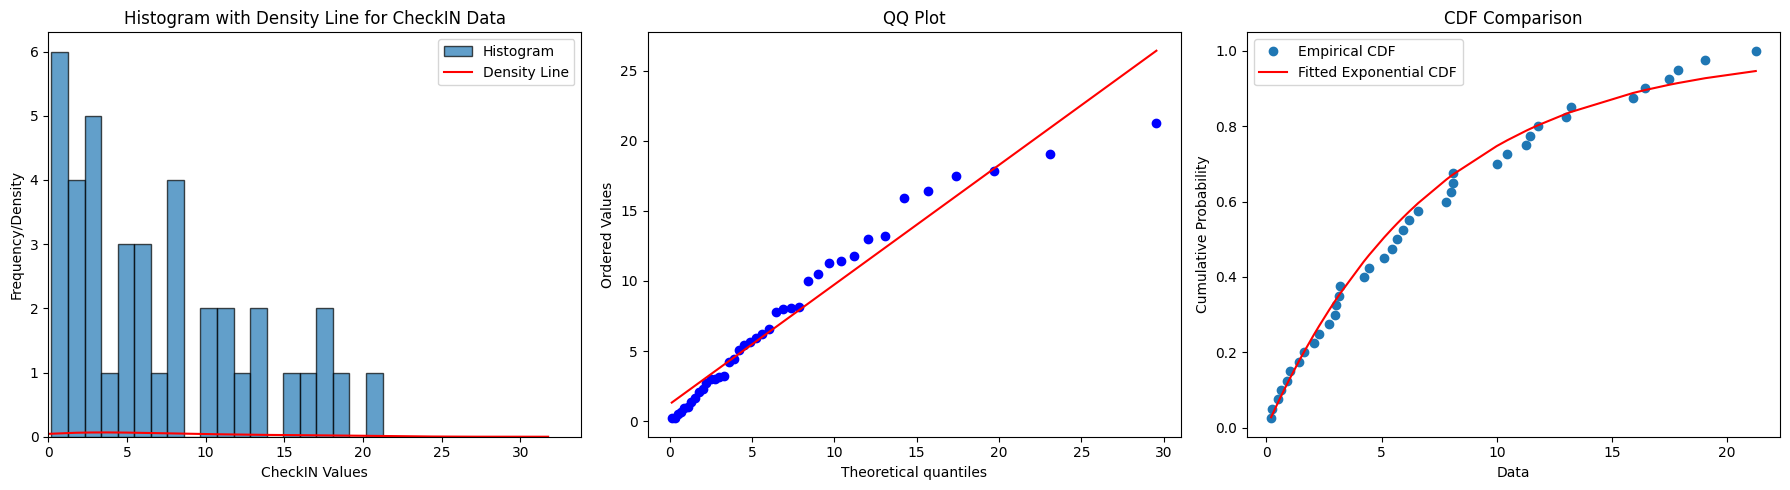

MLE Estimate for λ (lambda): 0.20346735189307463


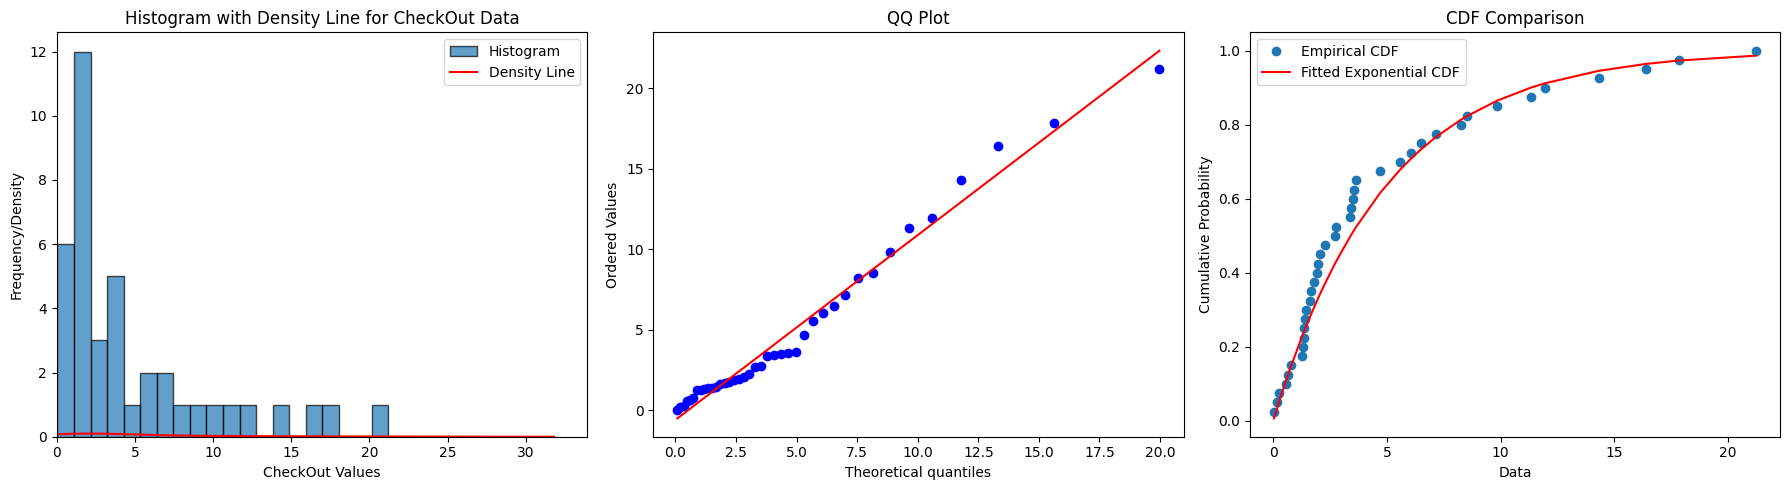

In [ ]:

file_path = '/root/Check_INOUT_Samples_Minutes.xlsx'

check_in_out_data = pd.read_excel(file_path)
column_name_in = 'CheckIN'
column_name_out = 'CheckOut'


def read_column_data(column_name):
    column_data = check_in_out_data[column_name]
    return column_data


def histogram_and_density_line(data, column_name, ax):
    # Plot a histogram for the 'CheckIN' column
    ax.hist(data, bins=20, edgecolor='black', alpha=0.7, label='Histogram')
    # Add a density line to the same plot
    data.plot(kind='kde', color='red', label='Density Line', bw_method=0.5, ax=ax)
    # Add titles and labels
    ax.set_title(f"Histogram with Density Line for {column_name} Data")
    ax.set_xlabel(f"{column_name} Values")
    ax.set_ylabel('Frequency/Density')
    ax.set_xlim(left=0)
    ax.legend()


def MLE_for_lambda(data):
    # Define the negative log-likelihood function for an exponential distribution
    def neg_log_likelihood(lambda_, data):
        return -np.sum(np.log(lambda_) - lambda_ * data)

    # MLE estimate for lambda (λ) of the exponential distribution
    lambda_mle = 1 / np.mean(data)
    print("MLE Estimate for λ (lambda):", lambda_mle)

    result = minimize(neg_log_likelihood, lambda_mle, args=(data,), bounds=[(0.0001, None)])
    lambda_mle = result.x[0]
    return lambda_mle


def QQ_plot(data, lambda_mle, ax):
    probplot(data, dist="expon", sparams=(0, 1 / lambda_mle), plot=ax)
    ax.set_title('QQ Plot')


def CDF_plot(data, lambda_mle, ax):
    sorted_data = np.sort(data)
    cdf_fitted = 1 - np.exp(-lambda_mle * sorted_data)
    ax.plot(sorted_data, np.arange(1, len(data) + 1) / len(data), marker='o', linestyle='', label='Empirical CDF')
    ax.plot(sorted_data, cdf_fitted, 'r-', label='Fitted Exponential CDF')
    ax.set_title('CDF Comparison')
    ax.set_xlabel('Data')
    ax.set_ylabel('Cumulative Probability')
    ax.legend(loc='upper left')


# check in plots and MLE
display(HTML("<h1 style='text-align: center; color: orange;'>Check In Graphical Comparison</h1>"))
data = read_column_data(column_name_in)
lambda_mle_in = MLE_for_lambda(data)
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
histogram_and_density_line(data, column_name_in, axs[0])
QQ_plot(data, lambda_mle_in, axs[1])
CDF_plot(data, lambda_mle_in, axs[2])
plt.tight_layout()
plt.show()

# check out plots and MLE
display(HTML("<h1 style='text-align: center; color: orange;'>Check Out Graphical Comparison</h1>"))
data = read_column_data(column_name_out)
lambda_mle_out = MLE_for_lambda(data)
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
histogram_and_density_line(data, column_name_out, axs[0])
QQ_plot(data, lambda_mle_out, axs[1])
CDF_plot(data, lambda_mle_out, axs[2])
plt.tight_layout()
plt.show()




In [ ]:
#Goodness-of-Fit Test for check in

#Compute the empirical CDF of the data
def empirical_cdf(data):
    data_sorted = np.sort(data)
    n = len(data)
    return data_sorted, np.arange(1, n + 1) / n


# Compute the KS test
def ks_test(data, cdf, *params):
    n = len(data)
    data_sorted, empirical_cdf_values = empirical_cdf(data)
    theoretical_cdf_values = cdf(data_sorted, *params)
    d_statistic = np.max(np.abs(empirical_cdf_values - theoretical_cdf_values))
    new_d_statistic = ((np.sqrt(n) + 0.26 + (0.25 / np.sqrt(n))) * (d_statistic - 0.2 / n))
    return new_d_statistic


# Define the theoretical CDF for the exponential distribution
def exp_cdf(x, lambda_):
    return 1 - np.exp(-lambda_ * x)


def d_critical(alpha):
    if 1 - alpha == 0.85:
        return 0.926
    if 1 - alpha == 0.9:
        return 0.900
    if 1 - alpha == 0.95:
        return 1.094
    if 1 - alpha == 0.975:
        return 1.19
    if 1 - alpha == 0.99:
        return 1.308


def hypothesis_test(critical_value, d_statistic):
    if d_statistic > critical_value:
        print(f"{d_statistic} > {critical_value} therefore, Reject the null hypothesis")
    else:
        print(f"{d_statistic} < {critical_value} therefore, Fail to reject the null hypothesis")


# KS test for check in
display(HTML("<h2 style='text-align: left ; color: orange;'>Check In KS test </h2>"))
d_statistic = ks_test(read_column_data(column_name_in), exp_cdf, lambda_mle_in)
critical_value = d_critical(0.05)
print("D Statistic:", d_statistic)
print("Critical Value:", critical_value)
hypothesis_test(critical_value, d_statistic)

# KS test for check out
display(HTML("<h2 style='text-align: let ; color: orange;'>Check Out KS test </h2>"))
d_statistic = ks_test(read_column_data(column_name_out), exp_cdf, lambda_mle_out)
critical_value = d_critical(0.05)
print("D Statistic:", d_statistic)
print("Critical Value:", critical_value)
hypothesis_test(critical_value, d_statistic)

D Statistic: 0.35350606939857365
Critical Value: 1.094
0.35350606939857365 < 1.094 therefore, Fail to reject the null hypothesis


D Statistic: 0.7958550518286888
Critical Value: 1.094
0.7958550518286888 < 1.094 therefore, Fail to reject the null hypothesis


אלגורתמי דגימה -

In [44]:
class Algorithm:

    def check_in_duration(self):
        u = np.random.uniform(0, 1)
        lambda_check_in = 0.1375
        pdf_exp = -math.log(1 - u) / (lambda_check_in)
        return pdf_exp

    def check_out_duration(self):
        u = np.random.uniform(0, 1)
        lambda_check_out = 0.20346
        pdf_exp = -math.log(1 - u) / (lambda_check_out)
        return pdf_exp

    def calculate_lambda(R_available, H):
        ALPHA = 20
        BETA_1 = 1.5
        BETA_2 = 2
        R_TOTAL = 110
        MAX_HOTEL_RATE = 10
        if R_available <= 0:
            return 0
        lambda_value = ALPHA * (R_available / R_TOTAL) ** BETA_1 * (H / MAX_HOTEL_RATE) ** BETA_2
        return lambda_value

    def customer_arrival_time(R_available, H):
        u = np.random.uniform(0, 1)
        pdf_exp = -math.log(1 - u) / (Algorithm.calculate_lambda(R_available, H))
        return pdf_exp

    def customer_stay_time(self):
        u1 = np.random.uniform(0, 1)
        if u1 < 0.25:
            return 1
        elif u1 < 0.71:
            return 2
        elif u1 < 0.91:
            return 3
        elif u1 < 0.96:
            return 4
        else:
            return 5

    def f_pool_duration(X):
        if (1 <= X < 2):
            f = X / 6
        if (2 <= X < 3):
            f = X / 5 + 1 / 8
        if (3 <= X < 4):
            f = 1 / 8
        return f

    def F_pool_duration(X):
        if 1 <= X < 2:
            return ((X ** 2) - 1) / 12
        elif 2 <= X < 3:
            return ((X ** 2) / 10) + (X / 8) - (0.4)
        elif 3 <= X < 4:
            return (X + 4) / 8
        else:
            return None

    F_pool_duration_intervals = [(1, 2), (2, 3), (3, 4)]

    # def invers_transform(F,intervals, u) :
    #     for a, b in intervals:
    #         if F(a) <= u <= F(b):
    #           x,u= symbols('x u')
    #           equation = Eq(F, u)
    #           inverse_function = solve(equation, x)

    # calculate pool duration
    def calc_pool_duration(self):
        u = np.random.uniform(0, 1)
        pool_duration = Algorithm.inverse_transform_pd(u)
        # print(f"Generated u: {u}, Corresponding pool duration: {pool_duration}")
        return pool_duration * 60

    #inverse transform for sampling pool stay duration
    def inverse_transform_pd(self, u):
        if 0 <= u < 0.25:
            return np.sqrt(12 * u + 1)
        elif 0.25 <= u < 0.875:
            return (-5 + np.sqrt(640 * u + 281)) / 8
        elif 0.875 <= u <= 1:
            return 8 * u - 4

    # does writing the function itself is necessary?
    #for pool duration and spa treatment its in hours, needs to be transformed-transformed

    #calculate spa treatment duration, ST stands for spa treatment
    def calc_spa_duration(self):
        u = np.random.uniform(0, 1)
        spa_duration = Algorithm.inverse_transform_ST(0.8)
        print(f"Generated u: {u}, Corresponding pool duration: {spa_duration}")
        return spa_duration * 60

    def inverse_transform_st(self, u):
        if 0 <= u < 0.5:
            return (1 + np.sqrt(u / 2)) / 2
        elif 0.5 <= u < 1:
            return (2 - np.sqrt((1 - u) / 2)) / 2

    def bar_service_time(self, mu=5, variance=1.5):
        sigma = math.sqrt(variance)
        service_time = -1
        while service_time < 0:
            # Generate u1 and u2 from U(0,1) using NumPy
            u1 = np.random.uniform(0, 1)
            u2 = np.random.uniform(0, 1)

            # Box-Muller transform
            z = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
            service_time = mu + sigma * z
        return service_time

    # # Example usage
    # sampled_service_time = bar_service_time()
    # print(f"Sampled service time: {sampled_service_time:.2f} minutes")

    def breakfast_arrival_time(self, lambda_breakfast=4):
        u = np.random.uniform(0, 1)
        pdf_exp = -math.log(1 - u) / lambda_breakfast
        return pdf_exp

    def breakfast_duration(self, mu=40, variance=10):
        sigma = math.sqrt(variance)
        breakfast_time = -1
        while breakfast_time < 0:
            # Generate u1 and u2 from U(0,1) using NumPy
            u1 = np.random.uniform(0, 1)
            u2 = np.random.uniform(0, 1)

            # Box-Muller transform
            z = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
            breakfast_time = mu + sigma * z
        return breakfast_time

    # Example usage
    sampled_breakfast_duration = breakfast_duration()
    print(f"Sampled breakfast time: {sampled_breakfast_duration:.2f} minutes")

    def customer_type(self):
        u = np.random.uniform(0, 1)
        if 0 <= u < 0.08:
            return 4
        if 0.08 <= u < 0.28:
            return 5
        if 0.28 <= u < 0.4:
            return 3
        if 0.4 <= u < 0.8:
            return 2
        else:
            return 1


def sample_bar_order(self, group):
    u1 = np.random.uniform(0, 1)
    u2 = np.random.uniform(0, 1)

    # 50% chance to order a drink
    if u1 <= 0.5:
        if group.amount_of_members <= 2:
            # For families (<= 2 members), only coffee or juice is available
            if u2 <= 0.5:
                return "coffee", 3  # Coffee for 3$
            else:
                return "juice", 3  # Juice for 3$
        else:
            # For non-families, there are more drink options
            if 0 <= u2 <= 0.2:
                return "coffee", 3  # Coffee for 3$
            elif 0.2 < u2 <= 0.4:
                return "juice", 3  # Juice for 3$
            elif 0.4 < u2 <= 0.6:
                return "beer", 3  # Beer for 3$
            elif 0.6 < u2 <= 0.8:
                return "wine", 10  # Wine for 10$
            else:
                return "cocktail", 15  # Cocktail for 15$

    # 50% chance to order food
    elif u1 > 0.5:
        if 0 <= u2 <= 0.25:
            return "toast", 10  # Toast for 10$
        elif 0.25 < u2 <= 0.5:
            return "salad", 12  # Salad for 12$
        elif 0.5 < u2 <= 0.75:
            return "ice cream", 3  # Ice cream for 3$
        else:
            return "chicken nuggets & chips", 15  # Chicken nuggets & chips for 15$



IndentationError: unindent does not match any outer indentation level (<string>, line 25)

$$
\mathbf{\Large \text{Calculating inverse transform for pool stay duration}}
$$
</br>
$$
f_{\text{pool_duration}}(X) =
\begin{cases}
\frac{X}{6} & \text{for } 1 \leq X < 2, \\
\frac{X}{5} + \frac{1}{8} & \text{for } 2 \leq X < 3, \\
\frac{1}{8} & \text{for } 3 \leq X < 4.
\end{cases}
$$
</br>
</br>  
$$
\text{Integral for } f_1(X) = \frac{X}{6} \text{ over the interval } [1, x]
$$
</br>   
$$
\int_1^t \frac{x}{6} \, dx = \frac{x^2 - 1}{12}
$$
</br>
$$
\text{This represents the result of the integral for the interval } 1 \leq x < 2.
$$
</br>
</br>
$$
\text{Integral for } f_2(X) = \frac{X}{5} + \frac{1}{8} \text{ over the interval } [2, x]
$$
</br>
$$
F(X=2) = \frac{x^2 - 1}{12} = \frac{2^2 -1}{12} = \frac{1}{4}
$$
</br>
$$
\frac{1}{4} + \int_2^t \left( \frac{x}{5} + \frac{1}{8} \right) dx
$$
</br>
$$
\
\int_2^t \frac{x}{5} + \frac{1}{8} \, dx = \frac{1}{5} \left( \frac{x^2}{2} \right) + \frac{x}{8} \Bigg|_2^t = \frac{1}{10} \left( x^2 - 4 \right) + \frac{1}{8} (x - 2)
\
$$
</br>
$$
\
\frac{1}{4} + \left( \frac{x^2}{10} - \frac{4}{10}   + \frac{x}{8} - \frac{2}{8} \right)
$$
</br>
$$
 = \frac{x^2}{10} + \frac{x}{8} - 0.4
\
$$
</br>
$$
This\ represents\ the\ result\ of\ th\ integral\ over\ the\ interval\ ( 2 \leq x < 3 ), where\ ( F(X=2) = \frac{1}{4} ) and\ the\ integral\ of\ the\ second\ part\ is\ computed.
$$
</br>  
$$
\text{Integral for } f_3(X) = \frac{1}{8} \text{ over the interval } [3, x]
$$
</br>
$$
F(X=3) = \frac{x^2}{10} + \frac{x}{8} - 0.4 =  \frac{3^2}{10} + \frac{3}{8} - 0.4 = \frac{7}{8}
$$
</br>   
$$
\frac{7}{8} + \int_3^t \frac{1}{8} \, dx = \left( \frac{x - 3}{8} \right) + \frac{7}{8} = \frac{x}{8} + \frac{1}{2}
$$
</br>
$$
\text{This represents the result of the integral for the interval } 3 \leq x < 4.
$$
</br>
</br>
$$
\text {Therefore}
$$
</br>
$$
F_{\text{pool_duration}}(x)=
\begin{cases}
\frac{x^2 - 1}{12} & \text{for } 1 \leq X < 2, \\
\frac{x^2}{10} + \frac{x}{8} - 0.4  & \text{for } 2 \leq X < 3, \\
\frac{x}{8} + \frac{1}{2} &\text{for } 3 \leq X < 4.
\end{cases}
$$

</br>
</br>
$$
{First\ Determine\ the\ Ranges\ for\ ( u )}
$$
$$
1. For\ ( 1 \leq X < 2 ):
\
F(X) = \frac{x^2 - 1}{12}, \quad U \in [0, F(2)] = [0, \frac{3}{12} = 0.25]
\
$$
$$
2.\ For\ ( 2 \leq X < 3 ):
\
F(X) = \frac{x^2}{10} + \frac{x}{8} - 0.4, \quad U \in [0.25, F(3)] = [0.25, 0.875]
\
$$
$$
3.\ For\ ( 3 \leq X < 4 ):
\
F(X) = \frac{x}{8} + \frac{1}{2}, \quad U \in [0.875, 1]
\
$$
</br>
</br>
$$
{Seccond\ Equate\ F(x) to u}
$$
$$
1. For\ ( 1 \leq X < 2 ):
U = \frac{x^2 - 1}{12} \implies x^2 = 12U + 1 \implies x = \sqrt{12U + 1}
$$
$$
2.\ For\ ( 2 \leq X < 3 ):
U = \frac{x^2}{10} + \frac{x}{8} - 0.4 \implies
40U = 4x^2 + 5x - 16 \implies 4x^2 + 5x - (40U + 16) = 0
$$
$$
Solve\ this\ quadratic\ equation\ for\ (x):
$$
$$
x = \frac{-5 + \sqrt{5^2 - 4(4)(-(40U + 16))}}{2(4)} = \frac{-5 + \sqrt{25 + 640U + 256}}{8}
\
$$
$$
3.\ For\ ( 3 \leq X < 4 ):
U = \frac{x}{8} + \frac{1}{2} \implies x = 8(U - 0.5)
$$
</br>
</br>


$$
The\ inverse\ CDF\, ( F^{-1}(U) ),\ is:
$$

</br>
$$
\
F_{\text{pool_duration}}^{-1}(u) =
\begin{cases}
\sqrt{12u + 1} & \text{for } 0 \leq U < 0.25, \\
\frac{-5 + \sqrt{25 + 160u + 64}}{8} & \text{for } 0.25 \leq U < 0.875, \\
8(u - 0.5) & \text{for } 0.875 \leq U \leq 1
\end{cases}
\
$$
</br>
$$
This\ function\ provides\ ( X )\ as\ a\ function\ of\ ( U ), where\ ( U \sim \text{Uniform}(0,1) ).
$$
</br>
</br>
$$
\mathbf{\Large \text{Calculating inverse transform for spa stay duration}}
$$
</br>
</br>
$$
f_{\text{pool_duration}}(X) =
\begin{cases}
16(X - 0.5) & \text{for } 0.5 \leq X < 0.75 \\
16(1 - X) & \text{for } 0.75 \leq X \leq 1
\end{cases}
$$

</br>
</br>  
$$
\text{Integral for } f_1(X) = 16(X - 0.5) \text{ over the interval } [0.5, x]
$$
</br>   
$$
\int_{0.5}^t 16(x - 0.5) \, dx = 8x^2 - 8x + 2
$$
</br>
$$
\text{This represents the result of the integral for the interval } 0.5 \leq x < 0.75.
$$
</br>
</br>
$$
\text{Integral for } f_2(X) = 16(1 - X) \text{ over the interval } [0.75, x]
$$
</br>
$$
F(X=0.75) = 8x^2 - 8x + 2 = 0.5
$$
</br>
$$
0.5 + \int_{0.75}^t \left( 16(1 - x) \right) dx
$$
</br>
$$
\
\int_{0.75}^t 16(1 - x) \, dx = 16 \cdot \left( x - \frac{x^2}{2} \right) - \left( 16 \cdot (0.75 - \frac{(0.75)^2}{2}) \right)
\
$$
</br>
$$
\
= 16x - 8x^2 - 7
\
$$
</br>
$$
\text{This represents the result of the integral for the interval } 0.75 \leq x \leq 1.
$$
</br>
</br>
$$
\text {Therefore}
$$
</br>
$$
F_{\text{pool_duration}}(x)=
\begin{cases}
8x^2 - 8x + 2 & \text{for } 0.5 \leq X < 0.75, \\
16x - 8x^2 - 7 & \text{for } 0.75 \leq X \leq 1.
\end{cases}
$$

</br>
</br>
$$
{First\ Determine\ the\ Ranges\ for\ ( u ) }
$$
$$
1. For\ ( 0.5 \leq X < 0.75 ):
\
F(X) = 8x^2 - 8x + 2, \quad U \in [0, F(0.75)] = [0, 0.5]
\
$$
$$
2.\ For\ ( 0.75 \leq X \leq 1 ):
\
F(X) = 16x - 8x^2 - 7, \quad U \in [0.5, 1]
\
$$
</br>
</br>
$$
{Second\ Equate\ F(x) to u }
$$
$$
1. For\ ( 0.5 \leq X < 0.75 ):
U = 8x^2 - 8x + 2 \implies 0 = 8x^2 - 8x + (2 - U)
$$
$$
x = \frac{-(-8) \pm \sqrt{(-8)^2 - 4 \cdot 8 \cdot (2 - U)}}{2 \cdot 8}
$$
$$
x = \frac{8 \pm \sqrt{64 - 64(2 - U)}}{16}
$$
$$
x = \frac{8 - \sqrt{64U}}{16} = 0.5 + \frac{\sqrt{U}}{2}
$$
$$
2.\ For\ ( 0.75 \leq X \leq 1 ):
U = 16x - 8x^2 - 5 \implies
0 = -8x^2 + 16x - (5 - U)
$$
$$
x = \frac{-16 \pm \sqrt{16^2 - 4 \cdot (-8) \cdot (5 - U)}}{-16}
$$
$$
x = \frac{16 - \sqrt{256 - 32(5 - U)}}{16}
$$
</br>
</br>


$$
The\ inverse\ CDF\, ( F^{-1}(U) ),\ is:
$$

</br>
$$
\
F_{\text{pool_duration}}^{-1}(u) =
\begin{cases}
0.5 + \frac{\sqrt{u}}{2} & \text{for } 0 \leq U < 0.5, \\
1 - \frac{\sqrt{1 - u}}{2} & \text{for } 0.5 \leq U \leq 1
\end{cases}
\
$$
</br>
$$
This\ function\ provides\ ( X )\ as\ a\ function\ of\ ( U ), where\ ( U \sim \text{Uniform}(0,1) ).
$$































In [49]:

class Customer:
    def __init__(self, reneging_time, group):
        self.rank = 10
        self.reneging_time = reneging_time
        self.group = group
        self.activity_diary = []

    def change_reneging_time(self, reneging_time):
        self.reneging_time = reneging_time

    def update_rank(self, decrease_value):
        counter = self.rank - decrease_value
        if counter < 0:
            self.rank == 0
        else:
            self.rank = counter


class Group:
    def __init__(self, amount_of_members, stay_time):
        self.amount_of_members = amount_of_members  # customers is a list
        self.customers = []
        self.stay_days = stay_time
        self.create_customers()
        self.days_left = stay_time.days

    def create_customers(self):
        if self.amount_of_members == 1:
            reneging_time = 20
        elif self.amount_of_members == 2:
            reneging_time = 15
        else:
            reneging_time = 10
        for _ in range(self.amount_of_members):
            self.customers.append(Customer(reneging_time, self))

    def generate_activity_diary(self):
        if 3 <= self.amount_of_members <= 5:
            u = random.random()
            for customer in self.customers:
                if 0 <= u <= 0.8:
                    customer.activity_diary = [['pool', False], ['bar', False]]
                else:
                    customer.activity_diary = [['bar', False, ], ['pool', False]]

        elif self.amount_of_members == 2:
            u = random.random()
            if 0 <= u <= 0.7:
                for customer in self.customers:
                    customer.activity_diary = [['pool', False], ['spa', False]]
            else:
                self.customers[0].activity_diary = [['pool', False], ['spa', False]]
                self.customers[1].activity_diary = [['spa', False]]

        elif self.amount_of_members == 1:
            self.customers[0].activity_diary = [['pool', False], ['spa', False], ['bar', False, ]]

    def calc_stay(self):
        self.stay_time -= 1
        if self.stay_time == 0:
            return True
        else:
            return False

    def set_stay_days(self):
        self.days_left = self.days_left - 1


IndentationError: unindent does not match any outer indentation level (<string>, line 92)

In [27]:
class Room:
    def __init__(self, room_type):
        self.room_id = 0
        self.room_type = room_type
        self.status = "Available"


class Hotel:
    def __init__(self):
        self.room_list = []
        self.available_rooms = []  # List of available rooms
        self.occupied_rooms = {}  # Dictionary to track occupied rooms
        self.create_hotel_rooms()  # List of all rooms

    def create_hotel_rooms(self):
        # 30 rooms for 4 or 5 people (family)
        for _ in range(30):
            room = Room("family")
            self.room_list.append(room)
            self.available_rooms.append(room)

        # 40 rooms for 2 or 3 people (standard)
        for _ in range(40):
            room = Room("Standard")
            self.room_list.append(room)
            self.available_rooms.append(room)

        # 30 rooms for 1 or 2 people (couple)
        for _ in range(30):
            room = Room("couple")
            self.room_list.append(room)
            self.available_rooms.append(room)

        # 10 suites for 1 or 2 people (extra charge)
        for _ in range(10):
            room = Room("Suite")
            self.room_list.append(room)
            self.available_rooms.append(room)

    def check_available_rooms(self, group):
        """Returns the first available room that fits the group size."""
        if len(self.available_rooms) == 0:
            return None  # No available rooms

        match group.amount_of_members:
            case 1:
                for room in self.available_rooms:
                    if room.room_type == "couple":
                        return room
            case 2:
                for room in self.available_rooms:
                    if room.room_type == "couple" or room.room_type == "Standard":
                        return room
            case 3:
                for room in self.available_rooms:
                    if room.room_type == "Standard":
                        return room
            case 4:
                for room in self.available_rooms:
                    if room.room_type == "family":
                        return room
            case 5:
                for room in self.available_rooms:
                    if room.room_type == "family":
                        return room

        return None  # If no matching room is found

    def occupation_room(self, room, group):
        self.available_rooms.remove(room)
        self.occupied_rooms[room] = group

# def print_rooms(self):
#         for room in self.room_list:
#             print(f"Room type: {room.room_type}, Status: {room.status}")

# hotel = Hotel()
# hotel.create_hotel_rooms()
# print_rooms(hotel)


In [37]:
class Bar:
    def __init__(self):
        avaiable_servers = 2
        # Bar menu with prices for drinks and meals
        self.bar_menu = {
            'coffee': 3,
            'juice': 3,
            'beer': 3,
            'wine': 10,
            'cocktail': 15,
            'toast': 10,
            'salad': 12,
            'ice cream': 3,
            'fish and chips': 15
        }


class Pool:
    def __init__(self):
        # Operating hours for the pool (7:00 to 19:00)
        self.opening_hour = time(7, 0)
        self.closing_hour = time(19, 0)
        self.chairs = 50
        self.available_chairs = self.chairs

    def grab_a_chair(self,customer):  #Grabs a chair by the pool if available, and returns True if successful
        if self.available_chairs > customer.group.amount_of_members:
            self.available_chairs -= customer.group.amount_of_members
            return True
        else:
            return False

    def release_a_chair(self):  #Releases a chair and leave the pool
        self.available_chairs -= customer.group.amount_of_members


class Spa:
    def __init__(self):  # Operating hours for the pool (7:00 to 19:00)
        self.opening_hour = time(7, 0)
        self.closing_hour = time(19, 0)
        self.max_guests = 30  # Maximum number of guests allowed
        self.occupied_spots = 0  # Tracks the number of guests currently inside

    def check_in(self):  #Allows a guest to enter the spa if there is an open spot
        if self.occupied_spots < self.max_guests:
            self.occupied_spots += 1
            return True
        else:
            return False

    def check_out(self):  #Removes a guest from the spa when they leave
        if self.occupied_spots > 0:
            self.occupied_spots -= 1
            return True
        else:
            return False


class Breakfast:
    def __init__(self):
        # Operating hours for the breakfast (7:00 to 19:00)
        self.opening_hour = time(6, 30)
        self.closing_hour = time(11, 30)
        self.max_guests = 60  # Maximum number of guests allowed
        self.occupied_spots = 0  # Tracks the number of guests currently inside

    def has_available_spots(self):  #checks if there is an open spot
        return self.occupied_spots < self.max_guests

    def sit_down(self, group): #Allows a guest to enter the breakfast if there is an open spot
        if self.occupied_spots + group.amount_of_members <= self.max_guests:
            self.occupied_spots += group.amount_of_members
            return True
        else:
            return False

    def leave(self, group):
        self.occupied_spots -= group.amount_of_members


class Reception:
    def __init__(self):
        self.opening_hour = time(7, 30)
        self.closing_hour = time(17, 0)
        self.available_servers = 2  # Number of available servers


    def mark_as_busy(self):
        if self.available_servers > 0:
            self.available_servers -= 1

    def mark_as_available(self):
        self.available_servers += 1

IndentationError: unindent does not match any outer indentation level (<string>, line 81)

In [5]:
class Queue:
    def __init__(self):
        self.server_queue = []  # List to store (time, group) tuples
        self.total_waiting_time = 0  # Average waiting time for all groups
        self.total_length_of_queue = 0  # Average length of the queue
        self.queue_total_length = 0  # Total length of the queue
        self.active_hours = 0

        self.num_customers_served = 0
        self.waiting_times = []
        # self.busy_time_total = 0
        # self.total_busy_time = 0
        self.total_queue_length_time = 0
        self.queue_lengths = [0]
        self.queue_change_times = [0]
        self.server_change_times = [0]
        self.server_states = [0]

        self.server_queue = []
        self.simulation_time = 20

    def add(self, group, arrival_time):  #Adds a group to the queue, keeping it sorted by time
        self.server_queue.append((group, arrival_time))
        self.queue_total_length += 1

    def add_to_front(self, group, arrival_time):  #Adda a group to the top of the line
        self.server_queue.appendleft((arrival_time, group))

    def pop(self):  #Removes and returns the first group in line according to FIFO
        if self.server_queue:
            return self.server_queue.pop(0)
        return None

    # def show_first(self): #Returns the group with the earliest time without removing it
    #     if self.server_queue:
    #         return self.queue[0]
    #     return None

    def is_empty(self):
        return len(self.server_queue) == 0

    def size(self):  #Returns the number of groups in the queue
        return len(self.server_queue)

    def get_average_waiting_time(self, current_time,
                                 arrival_time):  #Calculates and returns the average waiting time for all groups
        if self.total_length_of_queue == 0:
            return 0
        return self.total_waiting_time / self.total_length_of_queue

    def get_average_length_of_queue(self):  #Calculates and returns the average length of the queue
        if self.active_hours == 0:
            return 0
        return self.total_length_of_queue / self.active_hours

    def set_active_hours(self, oppening_hour, closing_hour):
        self.active_hours = closing_hour - oppening_hour

    def record_queue_length(self, current_time):
        if self.queue_lengths and self.queue_change_times:
            last_time = self.queue_change_times[-1]
            duration = current_time - last_time
            self.total_queue_length_time += self.queue_lengths[-1] * duration
        self.queue_change_times.append(current_time)
        self.queue_lengths.append(self.size())

    def record_busy_server(self):
        self.num_in_queue += 1
        self.server_queue.append(self.time)
        self.record_queue_length(self.time)

    def record_none_busy_server(self):
        self.num_customers_served += 1

    def calculate_statistics(self):
        if self.simulation_time == 0:
            print("Simulation time is zero, cannot calculate statistics.")
            return

        print(f"Number of customers served: {self.num_customers_served}")
        print(f"Average wait time: {self.avg_wait_time:.2f}")
        print(f"Utilization: {self.utilization:.2f}")
        print(f"Average queue length: {self.avg_queue_length:.2f}")

        self.avg_queue_length = self.total_queue_length_time / self.simulation_time

    def plot_statistics(self):
        # Plot simulation statistics
        fig, axes = plt.subplots(2, 1, figsize=(15, 10))
        axes = axes.ravel()
        # Plot queue length over time
        fig, axs = plt.subplots(1, 1, figsize=(8, 5))
        axs.step(self.queue_change_times, self.queue_lengths, where='post', label='Queue Length')
        axs.axhline(y=self.avg_queue_length, color='r', linestyle='--', label='Average Queue Length')
        axs.set_title('Queue Length Over Time')
        axs.set_xlabel('Time')
        axs.set_ylabel('Queue Length')
        axs.grid(True)
        axs.legend()
        plt.show()

# # Example usage:
# queue = Queue()
# queue.add("Group A", 10)
# queue.add("Group B", 5)
# queue.add("Group C", 15)

# print(queue.show_first())  # Output: (5, 'Group B')
# print(queue.remove_first())  # Output: (5, 'Group B')
# print(queue.show_first())  # Output: (10, 'Group A')

# # Simulate queue length recording
# queue.record_queue_length(1)
# queue.record_queue_length(5)
# queue.record_queue_length(10)

# # Set simulation time and generate the plot
# queue.simulation_time = 10
# queue.calculate_statistics()



In [ ]:
class Event:
    def __init__(self, time):
        self.time = time

    def handle(self, simulation):
        raise NotImplementedError("Handle method must be implemented by subclasses")


class ArrivalEvent(Event):
    def __init__(self, time):
        super().__init__(time)


    def handle(self, simulation):
        # Schedule the next arrival
        next_arrival_time = self.time + Algorithm.customer_arrival_time()
        sim.event_queue.add(ArrivalEvent(next_arrival_time))

        # Handle customer arrival
        #if server is busy
        if sim.reception.server_busy:
            sim.queue_check_in.add(self.group, self.time)
            sim.queue_check_in.record_busy_server()

        #if the server is available
        else:
            sim.reception.mark_as_busy(self.time)
            service_time = Algorithm.check_in_duration()
            sim.event_queue.add(CheckInEvent(self.time + service_time))


class CheckInEvent(Event):
    def __init__(self, time):
        super().__init__(time)

    def handle(self, sim):
        sim.queue_check_in.num_customers_served += 1
        pass

        # if sim.queue_check_in.size() > 0:
        #     sim.group = sim.queue_check_in.pop()
        #     sim.queue_check_in.num_in_queue -= 1
        #     sim.queue_check_in.waiting_times.append(self.time - self.group.arrival_time)
        # 
        #     if Hotel.check_for_available_room(group):
        #         if sim.reception.available_servers > 0:  #if the server is available
        #             sim.reception.mark_as_busy()
        #             sim.event_queue.add(PoolEvent(self.time + Algorithm.pool_duration()))
        #         else:
        #             sim.event_queue.add(CheckInEvent(self.time + Algorithm.check_in_duration()))
        # else:
        #     sim.reception.mark_as_available()  #make the server available when there in no queue


class PoolEvent(Event):
    def __init__(self, time):
        super().__init__(time)

    def handle(self, queue_pool, ):
        pass

In [ ]:
def calc_h(sim):
    total_rank = 0
    for customer in sim.group.customers:
        total_rank += customer.rank
    H = total_rank / sim.group.amount_of_members
    return H


def calc_r_available(total_available_rooms=None):
    total_available_rooms = 0
    for room in sim.Hotel.room_list:
        if room.status == "Available" or room.status == "last day":
            total_available_rooms += 1
    return total_available_rooms


class EndDayEvent(Event):
    def handle(self, sim):
        pass
        # #handle breakfast arrival
        # for group in sim.hotel.occupied_rooms[group]:
        #     sim.queue_breakfast.add(BreakfastEvent(self.time + Algorithm.breakfast_arrival_time()))
        # 
        # for group in sim.group:
        #     if group.calc_stay():
        #         for room in sim.hotel.occupied_rooms[group]:
        #             room.status = "last day"
        # calc_h()
        # calc_r_available()
        # sim.simulation_day += 1


In [ ]:

class BreakfastArrivalEvent(Event):
    def handle(self, simulation):
        pass
        # if sim.breakfast.is_open(self.time):
        # 
        #     #the group leaves today
        #     if self.group.stay_time() == 0:
        #         if self.time >= 11.00:
        #             sim.add_event(CheckOutEvent(self.time + Algorithm.check_out_duration()))
        # 
        #     # attempt to sit in
        #     remaining_members = sim.breakfast.sit_down(self.group)
        # 
        #     if remaining_members == 0:  # all the members set
        #         sim.add_event(BreakfastEndEvent(self.time + Algorithm.breakfast_duration(), self.group))
        #         sim.queue_breakfast.record_none_busy_server()
        #     else:  # not all members set in
        #         waiting_group = self.group.split(remaining)
        #         sim.queue_breakfast.add_to_front(waiting_group, self.time)
        #         sim.queue_breakfast.record_busy_server()


def is_open(self):
    return self.time >= 6.30 + self.time <= 11.30


class EndBreakfastEvent(Event):
    def __init__(self, time):
        super().__init__(time)
        is_open = True

    def handle(self, group, time):
        sim = Simulation().instance()
        if self.is_open() == False:
            group.next_event()
        if sim.queue_breakfast.size() > 0:  # if there are people in the queue
            sim.queue_breakfast.pop()
            sim.queue_breakfast.num_customers_served += 1
            # sim.queue_breakfast.waiting_times.append(self.time - group.arrival_time)
            sim.queue_breakfast.record_queue_lengh(self.time)
        else:
            sim.Breakfast.leave(group)

In [ ]:
class QueueAbandonmentEvent(Event):
    def __init__(self, time):
        super().__init__(time)
        self.decrease_rank = 0.03

    def handle(self, simulation):
        sim = Simulation().instance()
        group = sim.group, self.time
        sim.queue



In [ ]:
class EndBarEvent(Event):
    def __init__(self, time):
        super().__init__(time)

    def handle(self, group, time):
        sim = Simulation().instance()
        pass


class EndPoolEvent(Event):
    def __init__(self, time):
        super().__init__(time)

    def handle(self, group, time):
        sim = Simulation().instance()
        pass


class EndSpaEvent(Event):
    def __init__(self, time):
        super().__init__(time)

    def handle(self, group, time):
        sim = Simulation().instance()
        pass


class CheckOutEvent(Event):
    def __init__(self, time):
        super().__init__(time)

    def handle(self, group, time):
        sim = Simulation().instance()
        pass

In [29]:
class Simulation:
    # _instance = None  # Class variable to store the single instance
    # 
    # def __new__(cls, *args, **kwargs):
    #     if cls._instance is None:
    #         cls._instance = super(Simulation, cls).__new__(cls)
    #     return cls._instance

    def add_event(self, event):
        heapq.heappush(self.event_queue, event)

    def __init__(self):
        self.hotel = Hotel()
        self.bar = Bar()
        self.pool = Pool()
        self.spa = Spa()
        self.breakfast = Breakfast()
        self.reception = Reception()
        self.queue_check_in = Queue()
        self.queue_pool = Queue()
        self.queue_spa = Queue()
        self.queue_breakfast = Queue()
        self.queue_reception = Queue()
        self.event_queue = []  #minimum heap
        self.initialized = True


KeyboardInterrupt: 

# Running the Simulation

In [26]:
sim = Simulation()

#sim.add_event(ArrivalEvent(0))

AttributeError: 'Hotel' object has no attribute 'room_list'